In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from tqdm   import tqdm
# import some common libraries
import numpy as np, glob
import os, json, cv2, random
from ultralytics import YOLO
import torch
# import cv2
from pathlib import Path
from PIL import Image
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms as T
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!rm -R /content/yolov8 # remove any old directories
!mkdir /content/yolov8 # create a new dir

# !cp -R /content/drive/MyDrive/Fleck.v2i.yolov8.zip /content/yolov8/ # copy content to colab for fast loading
#!cp /content/drive/MyDrive/Ihsan_FingerPrint/Data_for_Yolo_Finger/data.yaml /content/yolov8/ # data charactersitcs classes and their names

rm: cannot remove '/content/yolov8': No such file or directory
mkdir: cannot create directory ‘/content/yolov8’: No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
!unzip '/content/drive/MyDrive/v2.yolov5.zip' -d "/content/v2.yolov5"

Archive:  /content/drive/MyDrive/v2.yolov5.zip
  inflating: /content/v2.yolov5/v2.yolov5/data.yaml  
  inflating: /content/v2.yolov5/v2.yolov5/README.roboflow.txt  
   creating: /content/v2.yolov5/v2.yolov5/test/
   creating: /content/v2.yolov5/v2.yolov5/test/images/
  inflating: /content/v2.yolov5/v2.yolov5/test/images/20230830_123033_jpg.rf.fee0f952f027a62b46f803c95de1b459.jpg  
  inflating: /content/v2.yolov5/v2.yolov5/test/images/20230830_123330_jpg.rf.32526711d7870ad1259892d59b00c7fc.jpg  
  inflating: /content/v2.yolov5/v2.yolov5/test/images/20230830_123501_jpg.rf.fb4ea3f9b45f74ea430e83a84e226f7e.jpg  
  inflating: /content/v2.yolov5/v2.yolov5/test/images/20230830_123855_jpg.rf.0f92643bff3ee186ec9e8677104013b9.jpg  
  inflating: /content/v2.yolov5/v2.yolov5/test/images/20230830_123857_jpg.rf.d9803c4c431043122d4b88c783a5acd0.jpg  
  inflating: /content/v2.yolov5/v2.yolov5/test/images/20230830_124000_jpg.rf.c6c668f142531292296aadf01595f5d3.jpg  
  inflating: /content/v2.yolov5/v2.y

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:


model = YOLO("yolov8m-seg.yaml") # build a new model from scratch
# project_name = '/content`/yolo8s_v2' # trains-> weights>best.pt is the model
model.train(data= "/content/v2.yolov5/v2.yolov5/data.yaml",
            epochs=100,
            imgsz=640, name ="fleckenv",
#             batch=16,
#             augment=True
#             workers=16
#             agnostic_nms=False
           )
# model.train(data="/home/netadmin/Fleck.v10i.yolov5pytorch/data.yaml", epochs=100, imgsz=640)



Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.yaml, data=/content/v2.yolov5/v2.yolov5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fleckenv2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 15.8MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /content/v2.yolov5/v2.yolov5/train/labels... 1040 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1040/1040 [00:00<00:00, 1424.11it/s]

train: New cache created: /content/v2.yolov5/v2.yolov5/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/v2.yolov5/v2.yolov5/valid/labels... 297 images, 0 backgrounds, 0 corrupt: 100%|██████████| 297/297 [00:00<00:00, 1456.26it/s]

val: New cache created: /content/v2.yolov5/v2.yolov5/valid/labels.cache


Plotting labels to runs/segment/fleckenv2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/fleckenv2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# !export 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512'

In [ ]:
model = YOLO(f"/content/v6((pure)(post_prior)(excluding_thumbs)).pt")  # load a custom trained


image 1/1 /content/20240315_135910_jpg.rf.09d8bf82996c39ab967a79fd0aafdfdd.jpg: 640x640 1 Index-Finger, 1 Little-Finger, 1 Middle-Finger, 1 Ring-Finger, 726.5ms
Speed: 2.6ms preprocess, 726.5ms inference, 13.0ms postprocess per image at shape (1, 3, 640, 640)


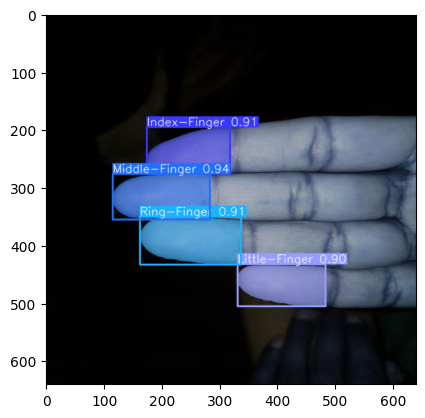

In [ ]:
model = model.to("cpu")
result = model("/content/20240315_135910_jpg.rf.09d8bf82996c39ab967a79fd0aafdfdd.jpg")
res_plotted = result[0].plot()
res_plotted.shape
plt.imshow(res_plotted)

plt.show()


image 1/1 /content/20240319_112501_jpg.rf.e712a24cb91d02225ee0f7d14a2b37d3.jpg: 640x640 1 Index-Finger, 1 Little-Finger, 1 Middle-Finger, 1 Ring-Finger, 2407.2ms
Speed: 19.4ms preprocess, 2407.2ms inference, 21.9ms postprocess per image at shape (1, 3, 640, 640)


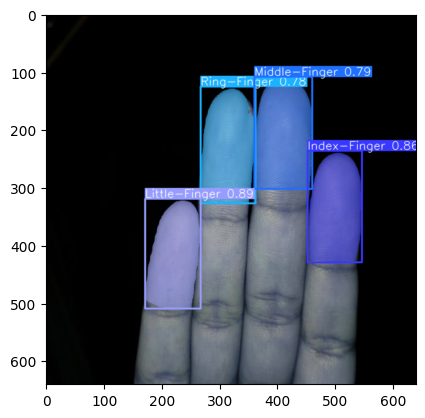

In [ ]:
model = model.to("cpu")
result = model("/content/20240319_112501_jpg.rf.e712a24cb91d02225ee0f7d14a2b37d3.jpg")
res_plotted = result[0].plot()
res_plotted.shape
plt.imshow(res_plotted)

plt.show()


image 1/1 /content/aug_20240319_122958_jpg.rf.4b07b9ff949da9f556bbac36b609ca3e.jpg: 640x640 1 Index-Finger, 1 Little-Finger, 1 Middle-Finger, 1 Ring-Finger, 1510.1ms
Speed: 2.9ms preprocess, 1510.1ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 640)


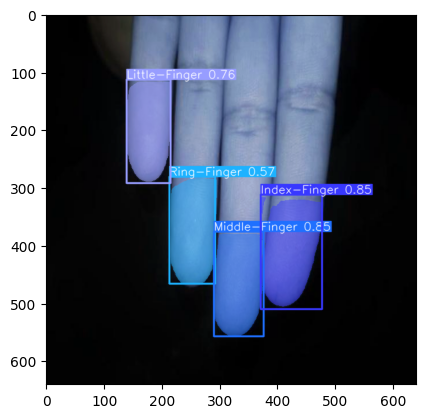

In [ ]:
model = model.to("cpu")
result = model("/content/aug_20240319_122958_jpg.rf.4b07b9ff949da9f556bbac36b609ca3e.jpg")
res_plotted = result[0].plot()
res_plotted.shape
plt.imshow(res_plotted)

plt.show()

In [ ]:

print(list(np.array(result[0].boxes.data)))

In [ ]:
print(result[0].boxes.data) #[x1, y1, x2, y2, score, label].

In [ ]:
!pip install tensorflow==2.13.1

In [ ]:
model.export(format="tflite")

In [ ]:
from utils.torch_utils import prune
prune(model)

model.export(format="onnx")


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s-seg.yaml")  # build a new model from scratch
# model = YOLO("yolov5nu.yaml")  # build a new model from scratch
# model = YOLO("yolov5nu.pt")  # load a pretrained model (recommended for training)

# Train the model
project_name = '/content/yolo8s_v2' # trains-> weights>best.pt is the model
model.train(data="/content/data/data.yaml",
            epochs=100, imgsz=640, project=project_name)
# model.predict(source='')
metrics = model.val()  # no arguments needed, dataset and settings remembered
box_map = metrics.box.map    # map50-95(B)
# box_map50 = metrics.box.map50  # map50(B)
# box_map75 = metrics.box.map75  # map75(B)
# box_maps = metrics.box.maps   # a list contains map50-95(B) of each category
seg_map = metrics.seg.map    # map50-95(M)
# seg_map50 = metrics.seg.map50  # map50(M)
# seg_map75 = metrics.seg.map75  # map75(M)
# seg_maps = metrics.seg.maps   # a list contains map50-95(M) of each category

print("Box Map",box_map)
print("Seg Map", seg_map)

model = YOLO(f"{project_name}/train/weights/best.pt")  # load a custom trained

# Export the model
model.export(format="onnx")


In [ ]:
#model.export(format="tflite")